In [31]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
# Input ticker you want to obtain news for
ticker = 'FB'

In [33]:
# Obtain news per ticker
stock = finvizfinance(ticker)
news = stock.TickerNews()

In [34]:
news['Ticker'] = ticker
news.head()
news['Date']= pd.to_datetime(news['Date'])
news

,Date,Title,Link,Ticker
0,2021-04-18 19:47:00,Facebook to announce new audio products on Mon...,https://finance.yahoo.com/news/facebook-announ...,FB
1,2021-04-18 19:29:00,Facebook: Our staff can carry on working from ...,https://finance.yahoo.com/news/facebook-staff-...,FB
2,2021-04-18 18:41:00,Facebook to Soon Announce Social Audio Product...,https://finance.yahoo.com/news/facebook-soon-a...,FB
3,2021-04-18 18:14:00,Facebook to announce new audio products on Mon...,https://finance.yahoo.com/news/facebook-announ...,FB
4,2021-04-18 14:54:00,These Are The 5 Best Stocks To Buy And Watch Now,https://www.investors.com/research/best-stocks...,FB
...,...,...,...,...
95,2021-04-09 10:09:00,Facebook to turn Menlo Park headquarters into ...,https://finance.yahoo.com/news/facebook-turn-m...,FB
96,2021-04-09 10:04:00,Facebook to turn Menlo Park headquarters into ...,https://finance.yahoo.com/news/facebook-turn-m...,FB
97,2021-04-09 09:58:00,COVID-19 is no longer markets greatest risk: s...,https://finance.yahoo.com/video/covid-19-no-lo...,FB
98,2021-04-09 09:05:00,Better Buy: Facebook vs. Google,https://www.fool.com/investing/2021/04/09/bett...,FB


In [35]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores = news['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores = pd.DataFrame(scores)
scores.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,1.000,0.000,0.0000
4,0.0,0.682,0.318,0.6369


In [36]:
sentiment = pd.concat([news, scores], join='inner', axis=1)
sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-18 19:47:00,Facebook to announce new audio products on Mon...,https://finance.yahoo.com/news/facebook-announ...,FB,0.0,1.000,0.000,0.0000
1,2021-04-18 19:29:00,Facebook: Our staff can carry on working from ...,https://finance.yahoo.com/news/facebook-staff-...,FB,0.0,1.000,0.000,0.0000
2,2021-04-18 18:41:00,Facebook to Soon Announce Social Audio Product...,https://finance.yahoo.com/news/facebook-soon-a...,FB,0.0,1.000,0.000,0.0000
3,2021-04-18 18:14:00,Facebook to announce new audio products on Mon...,https://finance.yahoo.com/news/facebook-announ...,FB,0.0,1.000,0.000,0.0000
4,2021-04-18 14:54:00,These Are The 5 Best Stocks To Buy And Watch Now,https://www.investors.com/research/best-stocks...,FB,0.0,0.682,0.318,0.6369


In [37]:
sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.062750,0.829240,0.108000,0.063625
std,0.120337,0.169853,0.134413,0.325654
min,0.000000,0.288000,0.000000,-0.718400
25%,0.000000,0.706250,0.000000,0.000000
50%,0.000000,0.816000,0.000000,0.000000
75%,0.074500,1.000000,0.212500,0.340000
max,0.561000,1.000000,0.439000,0.648600


In [38]:
sentiment = sentiment.groupby('Ticker').mean()
sentiment

,neg,neu,pos,compound
Ticker,,,,
FB,0.06275,0.82924,0.108,0.063625


<AxesSubplot:title={'center':'FB Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

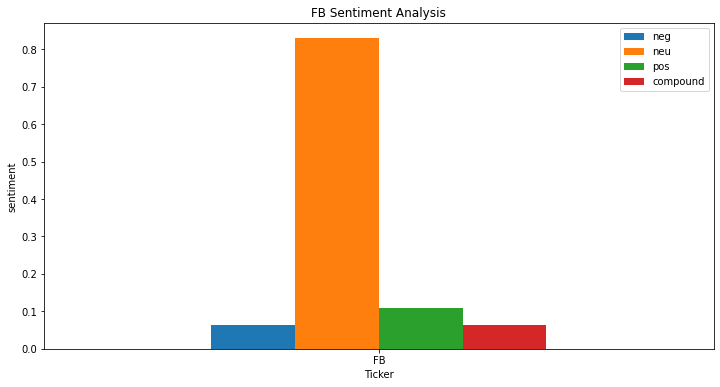

In [41]:
sentiment.plot.bar(figsize=(12,6),title=f'{ticker} Sentiment Analysis',ylabel='sentiment', rot=0)